In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
# Load all the results from the correct files and store them in a dictionary

results = {}

for filename in os.listdir('./Results/'):
    params = os.path.splitext(filename)[0].split('-')

    p = float(params[0].split('_')[1])
    k = float(params[1].split('_')[1])
    keep = float(params[2].split('_')[1])

    file = open(f'./Results/{filename}', 'r')

    values = np.array(list(map(float,file.read().splitlines())))

    results[f'{p}_{k}_{keep}'] = values



In [36]:
def determine_poly(X, Y, deg):
    slope, intersection = np.polyfit(X, Y, deg)

    y_vals = intersection + slope * X
    
    return slope, intersection, y_vals

def plot_results(X, y_vals, values, title):
    plt.figure()
    plt.plot(values)
    plt.axhline(5, color='r', linestyle='-')
    plt.plot(X, y_vals)
    plt.title(title)
    plt.xlabel('Generations')
    plt.ylabel("Results against random opponent")
    plt.plot()

C:\Users\Lars\AppData\Local\Temp\ipykernel_5996\1814261857.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


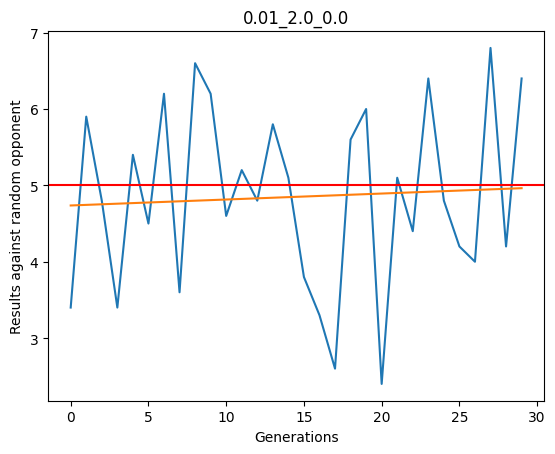

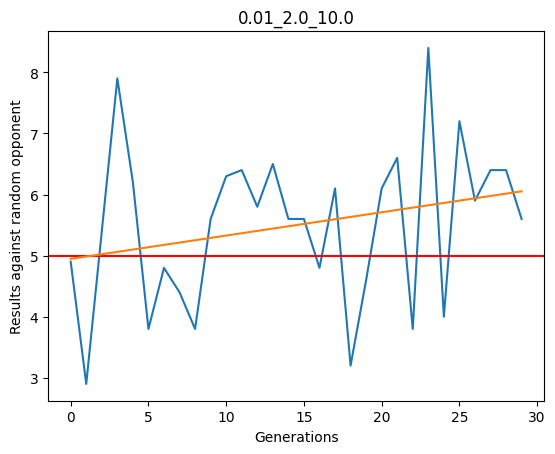

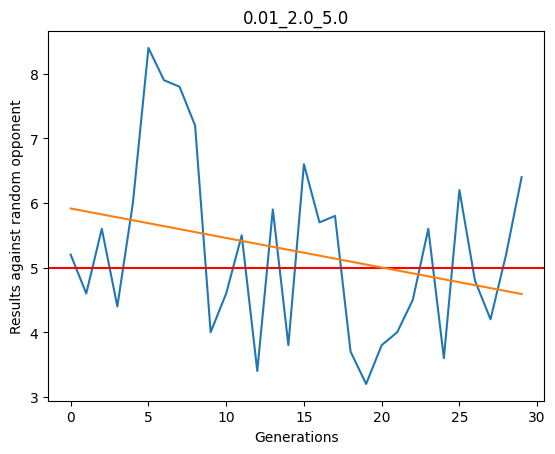

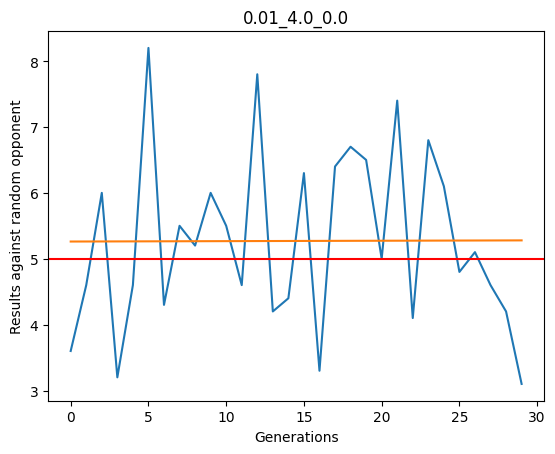

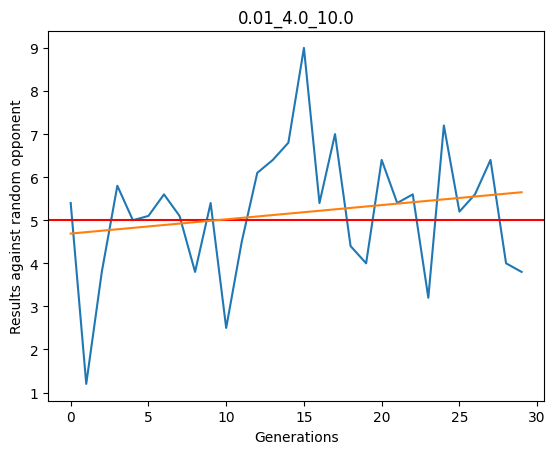

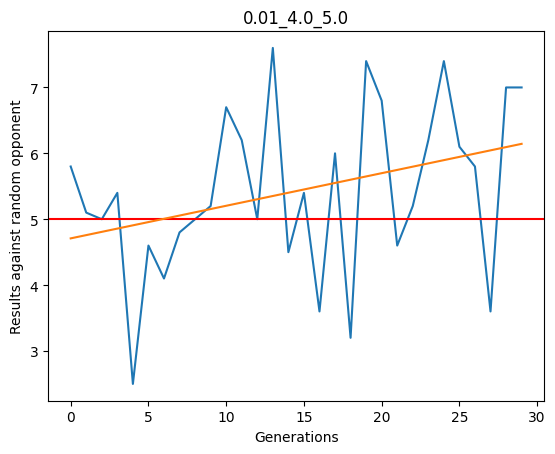

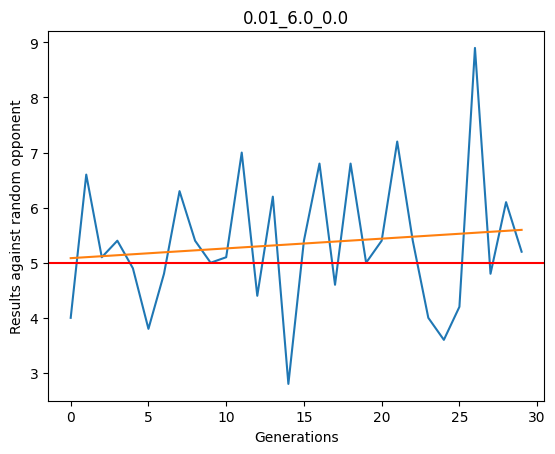

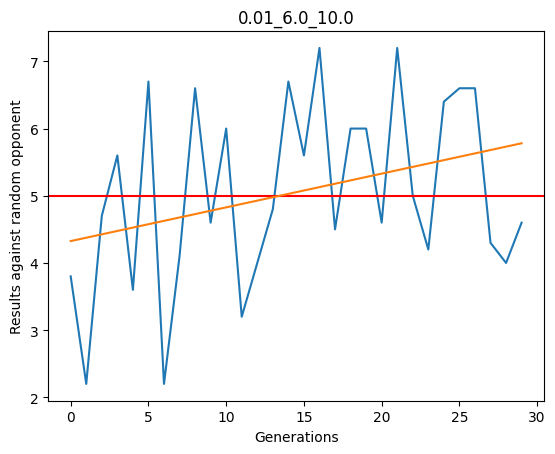

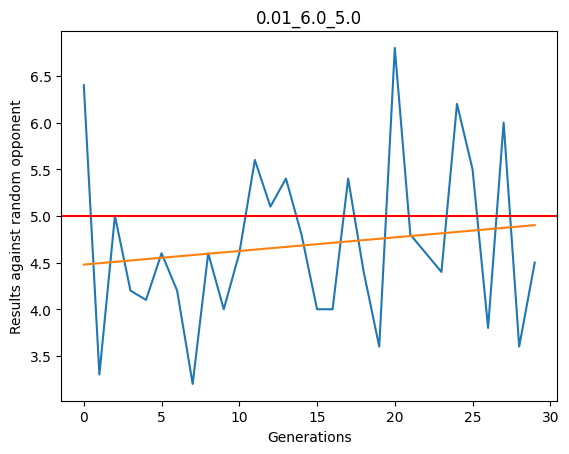

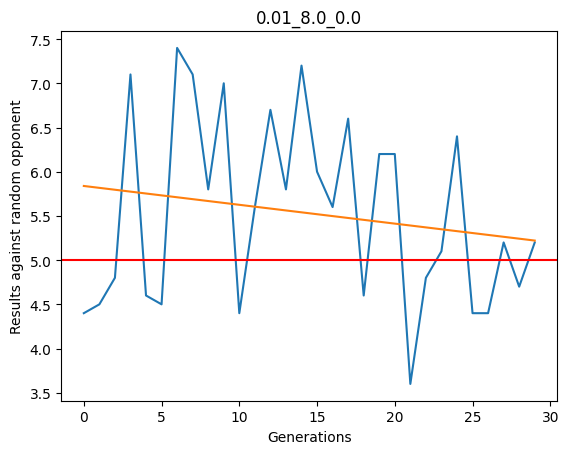

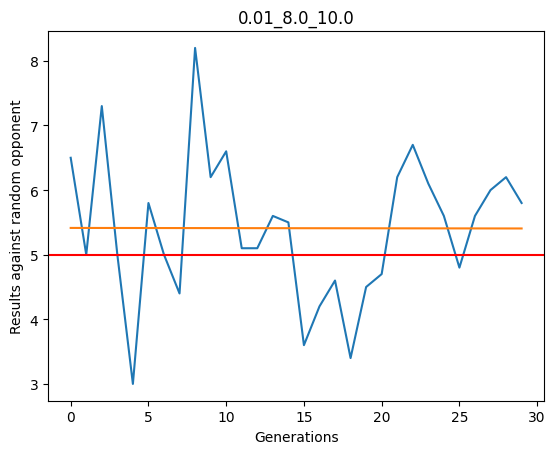

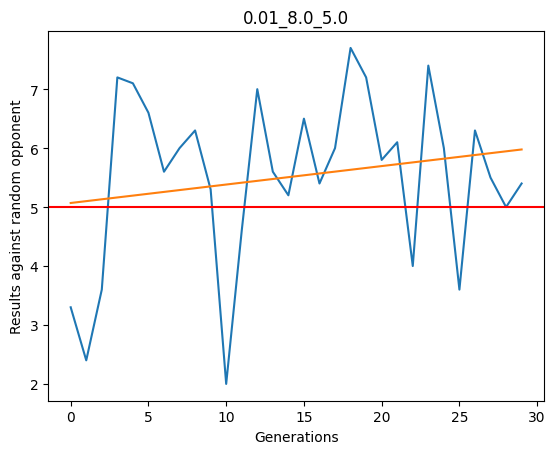

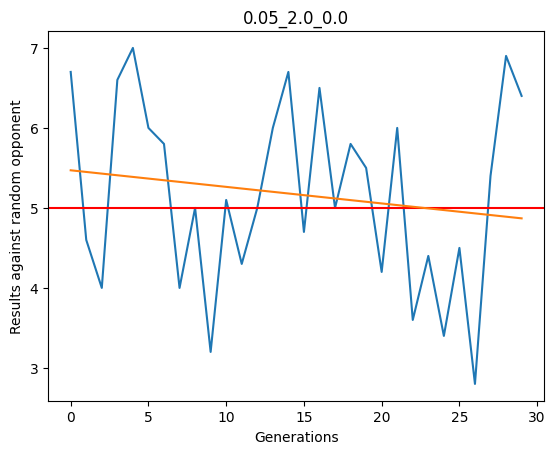

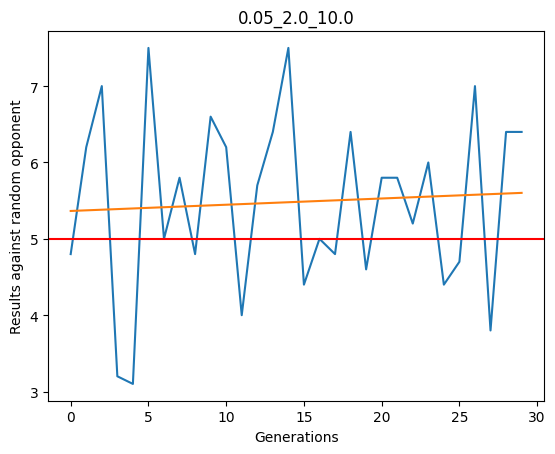

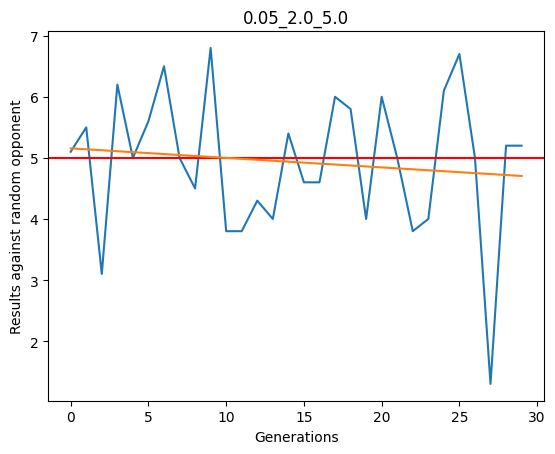

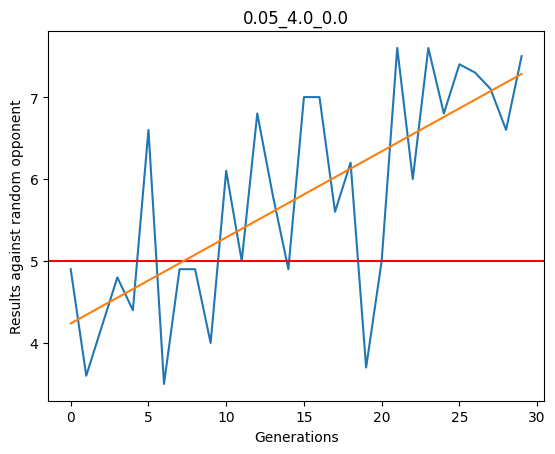

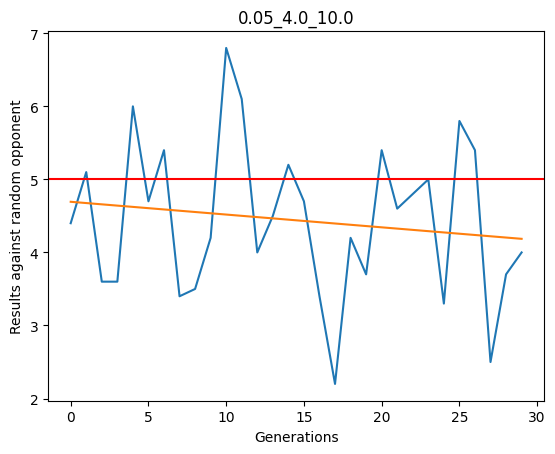

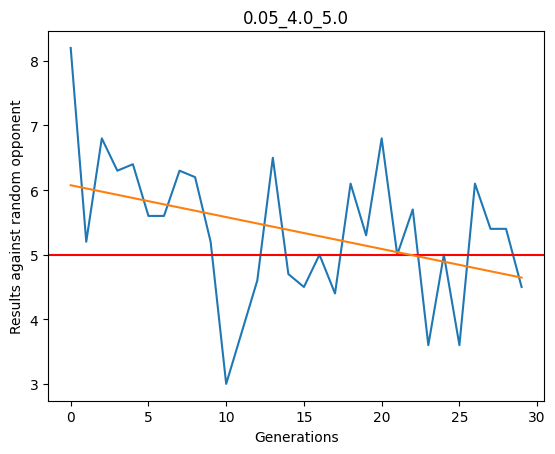

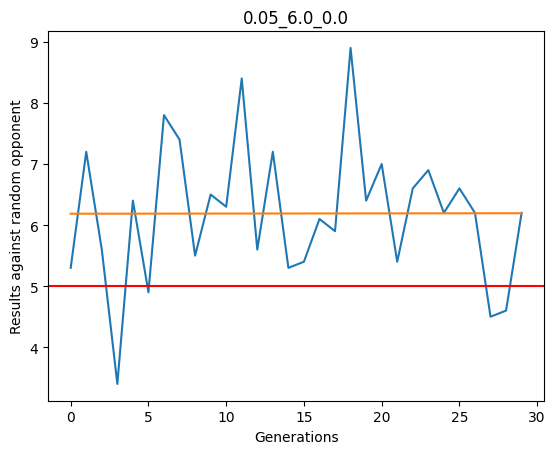

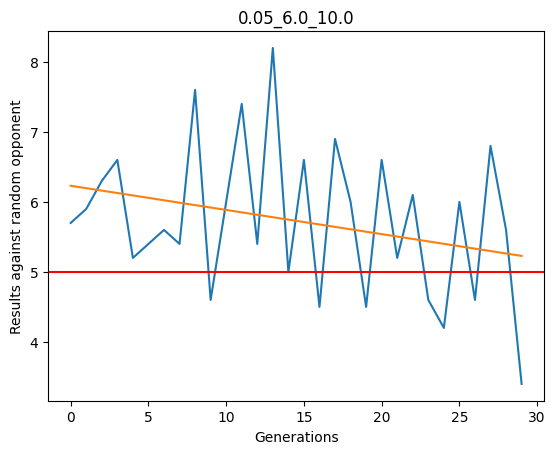

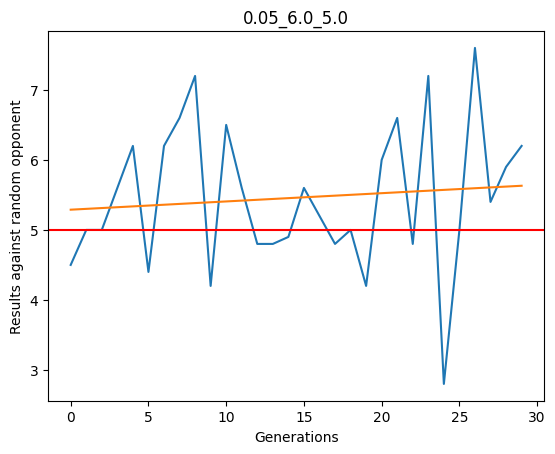

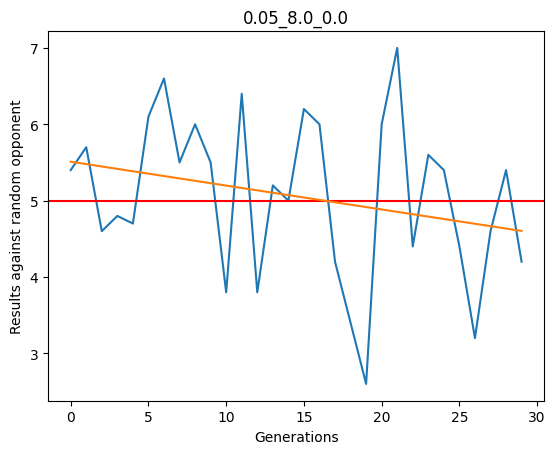

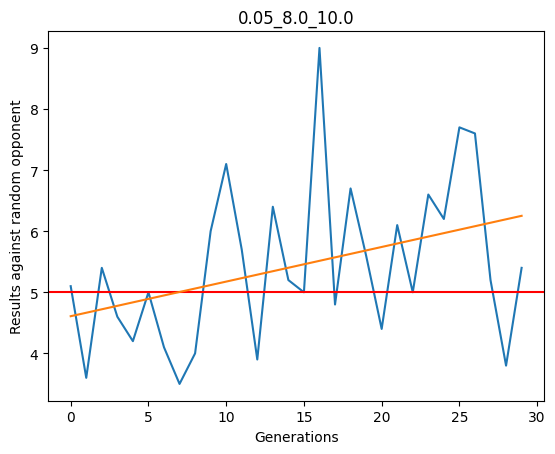

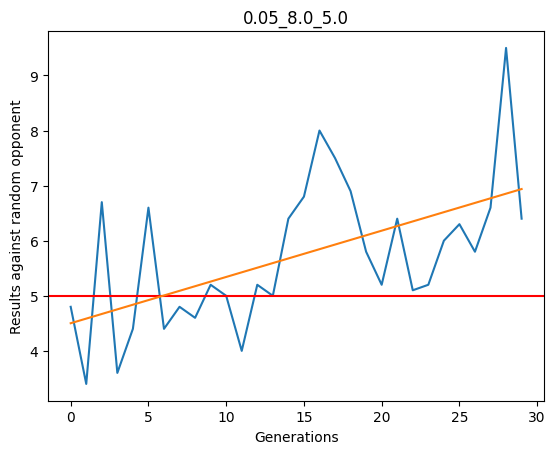

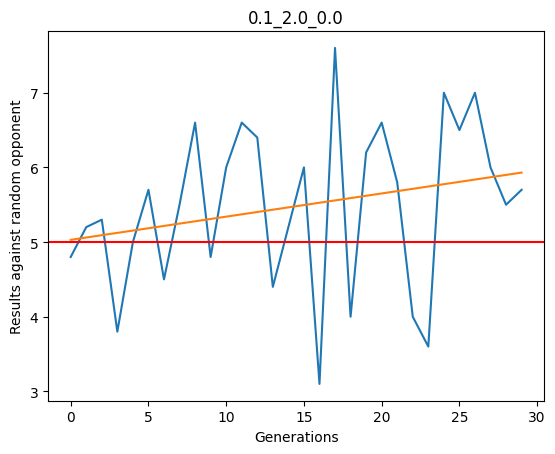

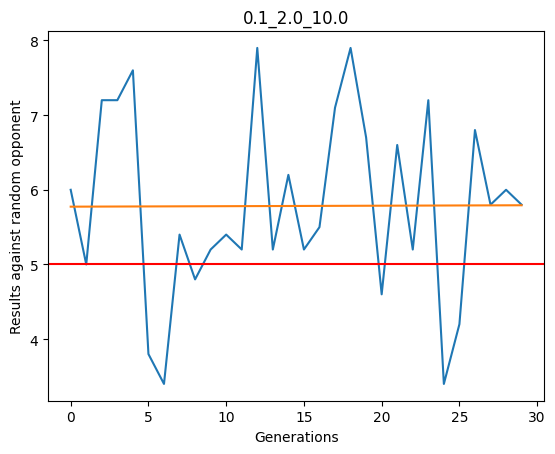

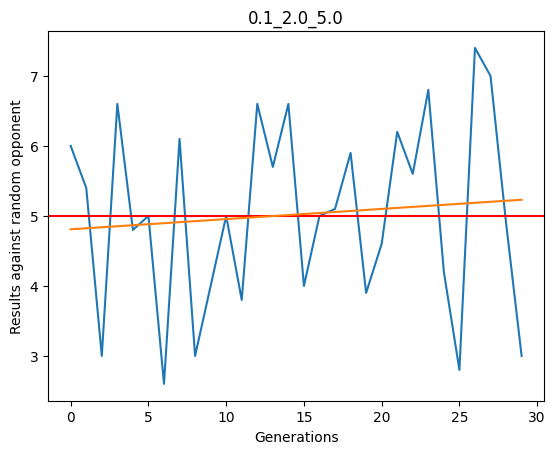

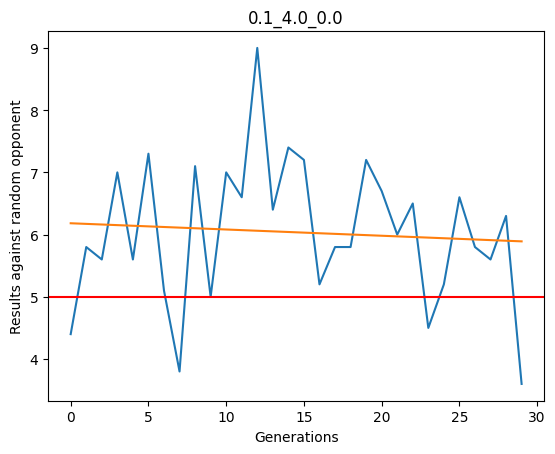

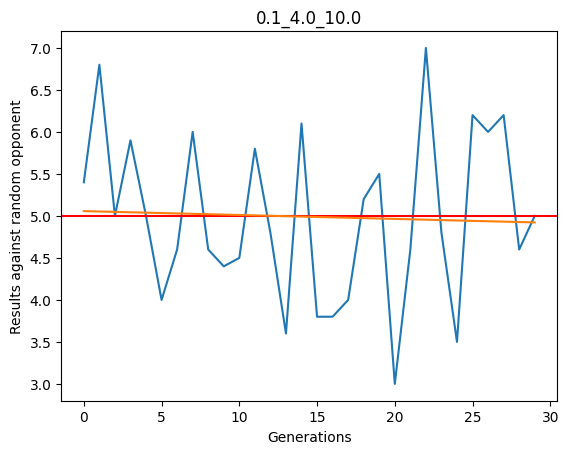

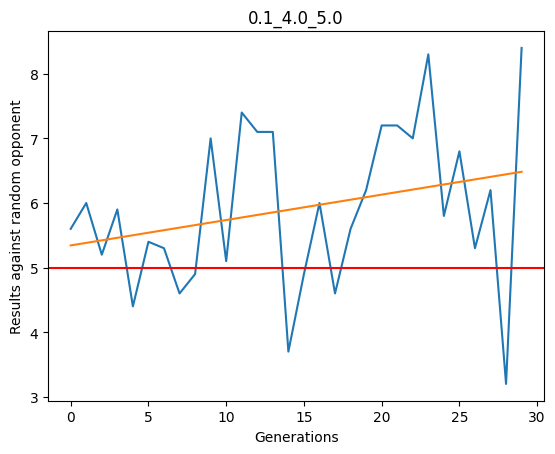

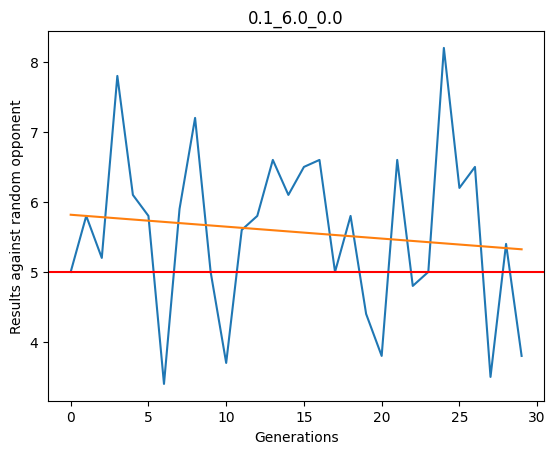

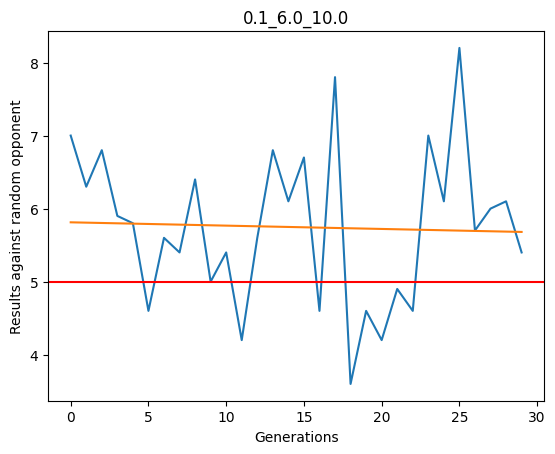

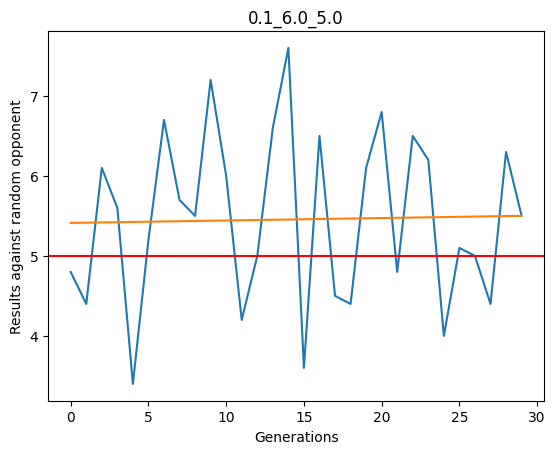

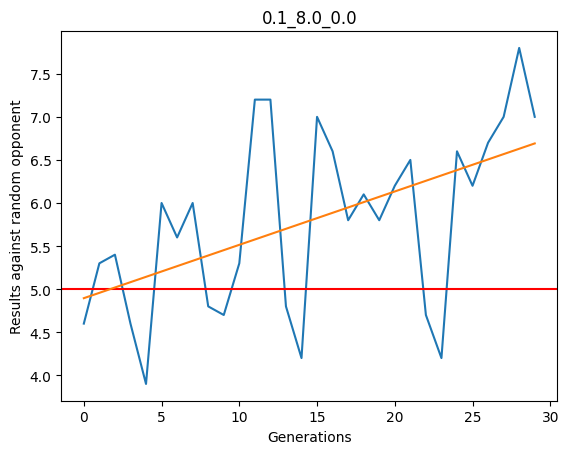

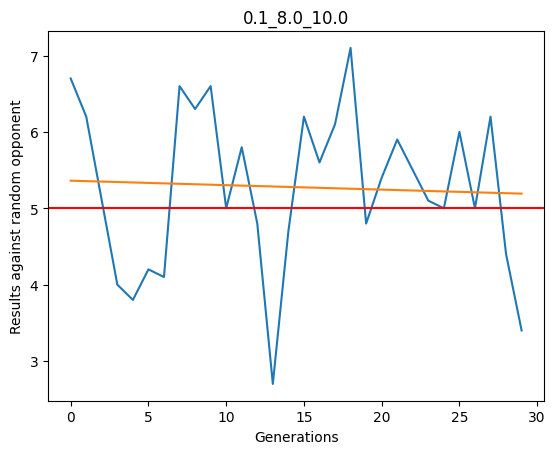

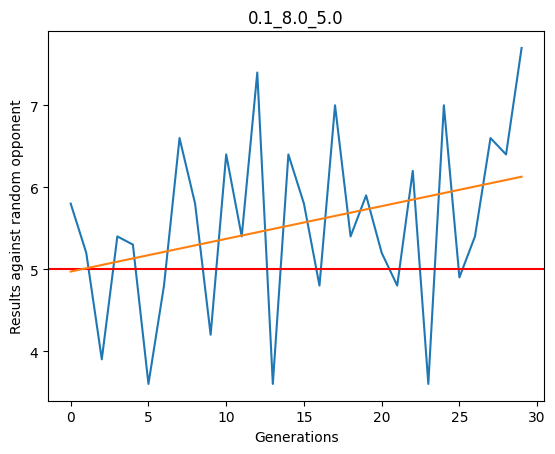

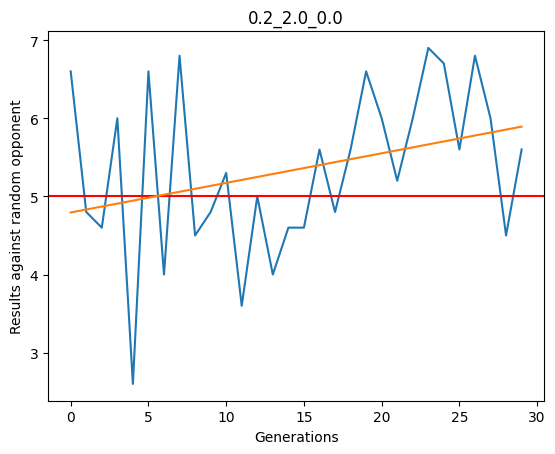

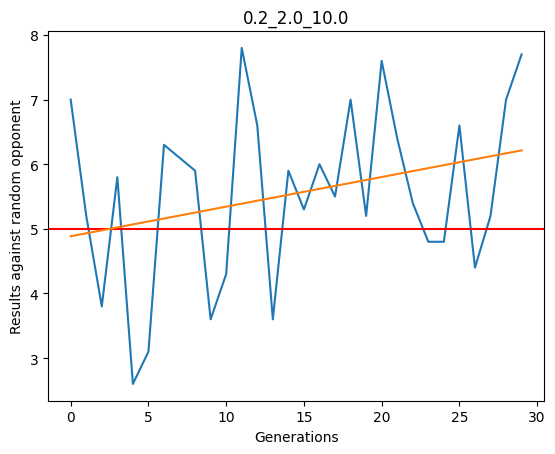

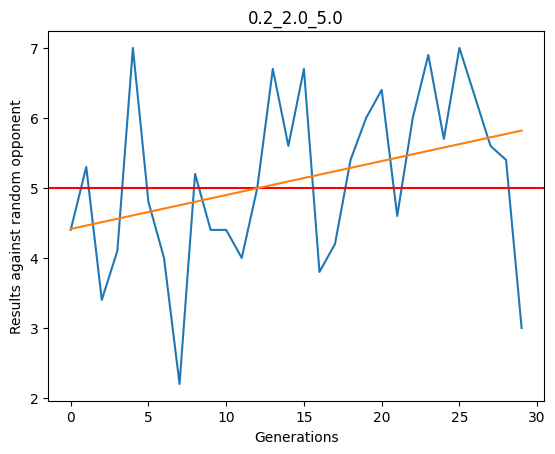

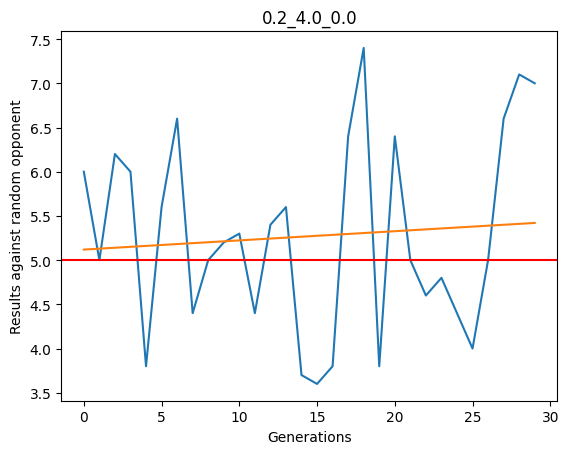

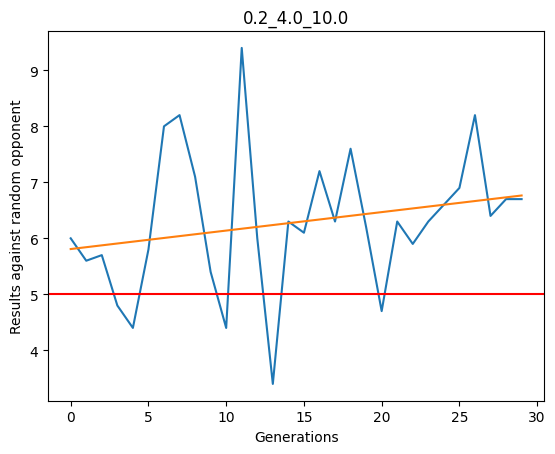

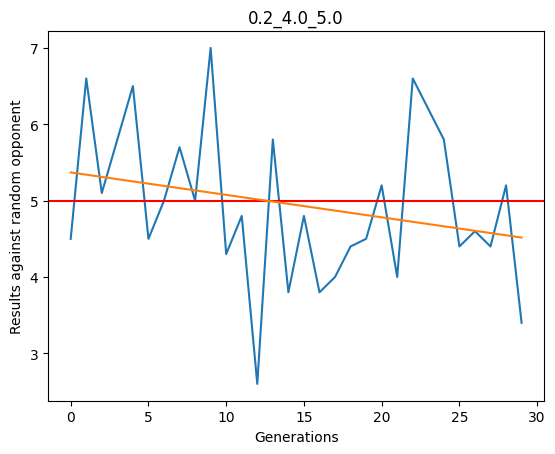

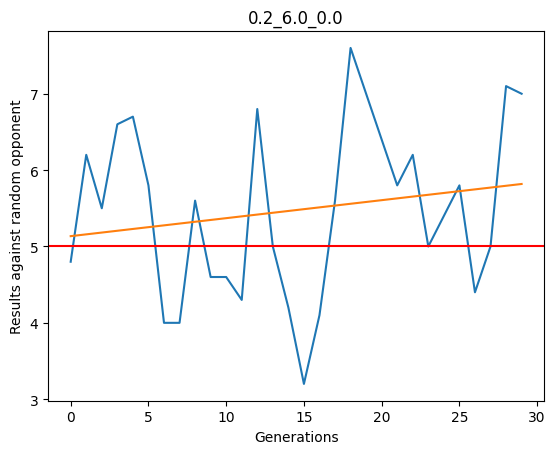

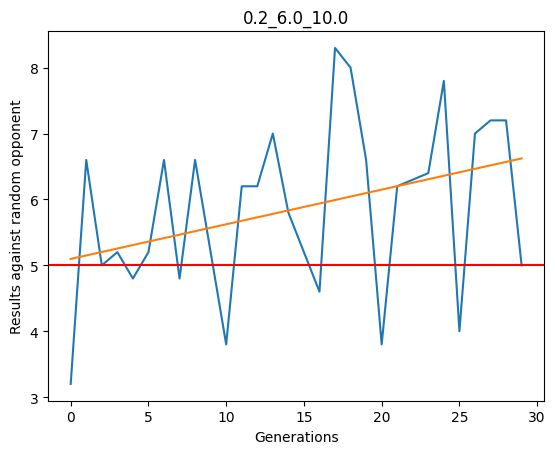

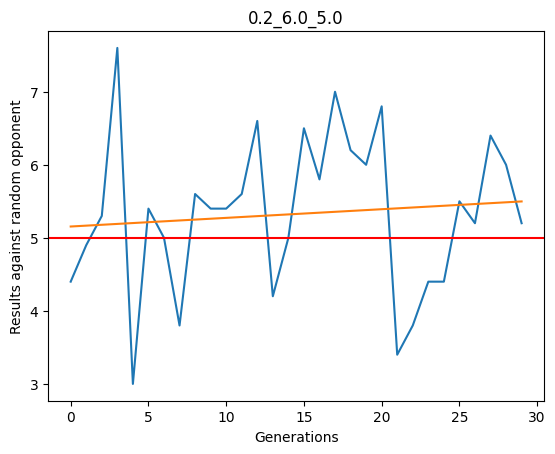

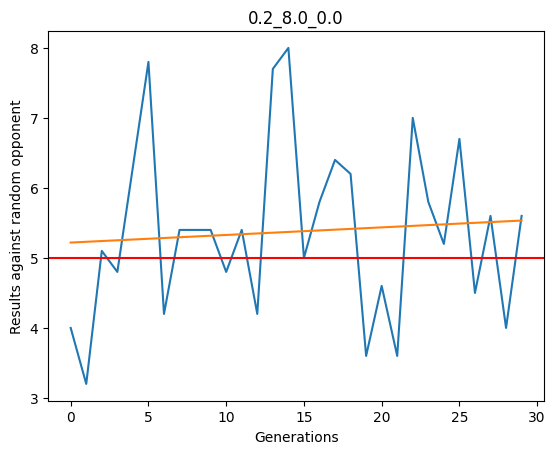

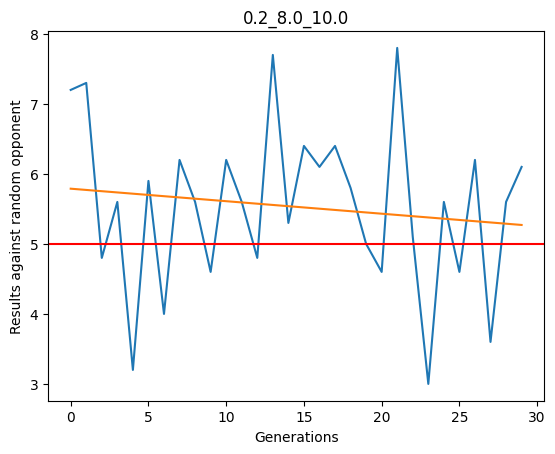

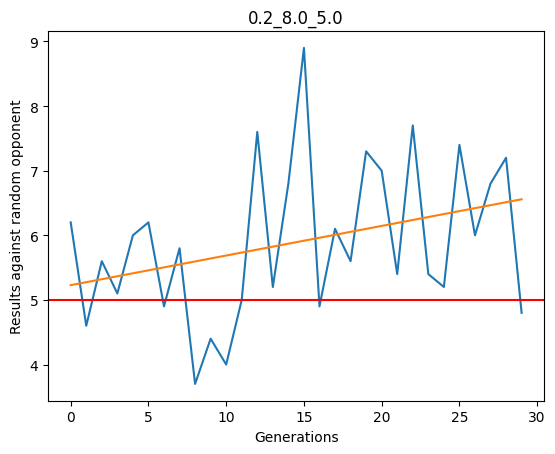

In [58]:
X = np.arange(0, 30)

slopes = {}
intersections = {}

for test in results:
    values = results[test]
    slope, intersection, y_vals = determine_poly(X, values, 1)
    slopes[test] = slope
    intersections[test] = intersection
    
    plot_results(X, y_vals, values, test)


In [62]:
ps = [0.01, 0.05, 0.1, 0.2]
ks = [2, 4, 6, 8]
keeps = [0, 5, 10]

def create_p_k_table():

    slope_df = pd.DataFrame(columns=ps, index=ks).fillna(0)
    intersect_df = pd.DataFrame(columns=ps, index=ks).fillna(0)

    for test in slopes:
        p = float(test.split('_')[0])
        k = float(test.split('_')[1])

        slope_df[p][k] += slopes[test]
        intersect_df[p][k] += intersections[test]

    return slope_df / 3, intersect_df / 3

def create_p_keep_table():

    slope_df = pd.DataFrame(columns=ps, index=keeps).fillna(0)
    intersect_df = pd.DataFrame(columns=ps, index=keeps).fillna(0)

    for test in slopes:
        p = float(test.split('_')[0])
        keep = float(test.split('_')[2])

        slope_df[p][keep] += slopes[test]
        intersect_df[p][keep] += intersections[test]

    return slope_df / 4, intersect_df / 4

def create_k_keep_table():

    slope_df = pd.DataFrame(columns=ks, index=keeps).fillna(0)
    intersect_df = pd.DataFrame(columns=ks, index=keeps).fillna(0)

    for test in slopes:
        k = float(test.split('_')[1])
        keep = float(test.split('_')[2])

        slope_df[k][keep] += slopes[test]
        intersect_df[k][keep] += intersections[test]

    return slope_df / 4, intersect_df / 4

slope_df_p_k, intersect_df_p_k = create_p_k_table()
slope_df_p_keep, intersect_df_p_keep = create_p_keep_table()
slope_df_k_keep, intersect_df_k_keep = create_k_keep_table()

print(slope_df_p_k)
print(intersect_df_p_k)
print(slope_df_p_keep)
print(intersect_df_p_keep)
print(slope_df_k_keep)
print(intersect_df_k_keep)






       0.01      0.05      0.10      0.20
2  0.000096 -0.009381  0.015417  0.044071
4  0.027720  0.012740  0.008202  0.004657
6  0.027490 -0.007490 -0.006170  0.029329
8  0.003241  0.036470  0.031991  0.012933
       0.01      0.05      0.10      0.20
2  5.199713  5.330466  5.204229  4.697634
4  4.886953  5.001935  5.527742  5.432473
6  4.629176  5.901935  5.680573  5.129176
8  5.440789  4.873405  5.076129  5.412473
        0.01      0.05      0.10      0.20
0   0.001207  0.013331  0.016485  0.020667
5   0.012425  0.007725  0.024194  0.019188
10  0.030278  0.003198 -0.003598  0.028387
        0.01      0.05      0.10      0.20
0   5.230000  5.350860  5.480968  5.066989
5   5.043172  5.255484  5.134194  5.041774
10  4.844301  5.224462  5.501344  5.395054
           2         4         6         8
0   0.014010  0.026491  0.006135  0.005056
5   0.000445  0.002519  0.010311  0.050256
10  0.023198  0.010979  0.015923  0.008165
           2         4         6         8
0   5.007688  5.20005

C:\Users\Lars\AppData\Local\Temp\ipykernel_5996\2484794112.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope_df[p][k] += slopes[test]
C:\Users\Lars\AppData\Local\Temp\ipykernel_5996\2484794112.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_df[p][k] += intersections[test]
C:\Users\Lars\AppData\Local\Temp\ipykernel_5996\2484794112.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope_df[p][keep] += slopes[te

In [52]:
print()

{'0.01_2.0_0.0': 0.00780867630700768, '0.01_2.0_10.0': 0.03813125695216897, '0.01_2.0_5.0': -0.045650723025584206, '0.01_4.0_0.0': 0.000600667408231221, '0.01_4.0_10.0': 0.03308120133481635, '0.01_4.0_5.0': 0.04947719688542817, '0.01_6.0_0.0': 0.01770856507230255, '0.01_6.0_10.0': 0.05018909899888758, '0.01_6.0_5.0': 0.014571746384871902, '0.01_8.0_0.0': -0.021290322580645202, '0.01_8.0_10.0': -0.00028921023359303996, '0.01_8.0_5.0': 0.03130144605116788, '0.05_2.0_0.0': -0.020711902113459572, '0.05_2.0_10.0': 0.00816462736373734, '0.05_2.0_5.0': -0.015595105672970037, '0.05_4.0_0.0': 0.1050055617352613, '0.05_4.0_10.0': -0.017486095661846647, '0.05_4.0_5.0': -0.04929922135706363, '0.05_6.0_0.0': 0.00028921023359275715, '0.05_6.0_10.0': -0.034549499443826626, '0.05_6.0_5.0': 0.011790878754171234, '0.05_8.0_0.0': -0.03125695216907689, '0.05_8.0_10.0': 0.05666295884315894, '0.05_8.0_5.0': 0.084004449388209, '0.1_2.0_0.0': 0.03105672969966618, '0.1_2.0_10.0': 0.0006451612903224693, '0.1_2.

In [59]:
print(intersections['0.05_2.0_10.0'])
print(intersections['0.05'])

5.364946236559142
